In [1]:
import reservoirpy as rpy
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import pymc as pm

rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(42)  # make everything reproducible!

## The NIPH data files.
https://github.com/folkehelseinstituttet/surveillance_data

In [2]:

# URL of the data files

#url="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_death_by_time_2022-03-18.xlsx"
url_msis_sexage="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_msis_by_time_sex_age_latest.csv"
url_hosp="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_hospital_by_time_latest.csv"
url_lab="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_lab_by_time_latest.csv"
url_death="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_death_by_time_latest.csv"
url_demo="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_demographics_latest.csv"
url_msis_location="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_msis_by_location_latest.csv"
url_vac="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_sysvak_by_time_location_latest.csv"
#url = "https://github.com/folkehelseinstituttet/surveillance_data/blob/67a2cb6ba56c10e78a296dfde7a9ceff185ae526/covid19/data_covid19_death_by_time_2022-03-18.xlsx"


In [3]:

# Read the cvs file from the URL
msis_sexage = pd.read_csv(url_msis_sexage)
msis_location = pd.read_csv(url_msis_location)

hosp = pd.read_csv(url_hosp)
lab=pd.read_csv(url_lab)
demo=pd.read_csv(url_demo)
death=pd.read_csv(url_death)
vac=pd.read_csv(url_vac)
# Change the dates to date_time
lab['date']=pd.to_datetime(lab.date)
death['date']=pd.to_datetime(death.date)
msis_location['date']=pd.to_datetime(msis_location.date)
msis_sexage['date']=pd.to_datetime(msis_sexage.date)
demo['date']=pd.to_datetime(demo.date)
hosp['date']=pd.to_datetime(hosp.date)
vac['date']=pd.to_datetime(vac.date)

In [4]:
# Calculate the time differences between consecutive entries in the date columns
# for each DataFrame and print the results.
print('lab dT: ' + str(lab.date[1]-lab.date[0]))
print('death dT: ' + str(death.date[1]-death.date[0]))
print('msis_sexage dT: ' + str((msis_sexage.date.unique()[1]-msis_sexage.date.unique()[0]).days))
print('demo dT: ' + str((demo.date[1]-demo.date[0])))
print('hosp dT: ' + str(hosp.date[1]-hosp.date[0]))
print('vac dT: ' + str(vac.date[1]-vac.date[0]))


lab dT: 1 days 00:00:00
death dT: 7 days 00:00:00
msis_sexage dT: 7
demo dT: 0 days 00:00:00
hosp dT: 1 days 00:00:00
vac dT: 1 days 00:00:00


# Some plots



In [17]:
death

,granularity_time,granularity_geo,location_code,border,age,sex,year,week,yrwk,season,x,date,n,date_of_publishing
0,isoweek,nation,norge,2020,total,total,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
1,isoweek,nation,norge,2020,total,total,2020,9,2020-09,2019/2020,32.0,2020-03-01,0,2022-11-14
2,isoweek,nation,norge,2020,total,total,2020,10,2020-10,2019/2020,33.0,2020-03-08,0,2022-11-14
3,isoweek,nation,norge,2020,total,total,2020,11,2020-11,2019/2020,34.0,2020-03-15,4,2022-11-14
4,isoweek,nation,norge,2020,total,total,2020,12,2020-12,2019/2020,35.0,2020-03-22,9,2022-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,isoweek,nation,norge,2020,total,total,2022,41,2022-41,2022/2023,12.0,2022-10-16,29,2022-11-14
139,isoweek,nation,norge,2020,total,total,2022,42,2022-42,2022/2023,13.0,2022-10-23,23,2022-11-14
140,isoweek,nation,norge,2020,total,total,2022,43,2022-43,2022/2023,14.0,2022-10-30,22,2022-11-14
141,isoweek,nation,norge,2020,total,total,2022,44,2022-44,2022/2023,15.0,2022-11-06,44,2022-11-14


# Reservoir Computing

In [5]:
from reservoirpy.nodes import Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9)

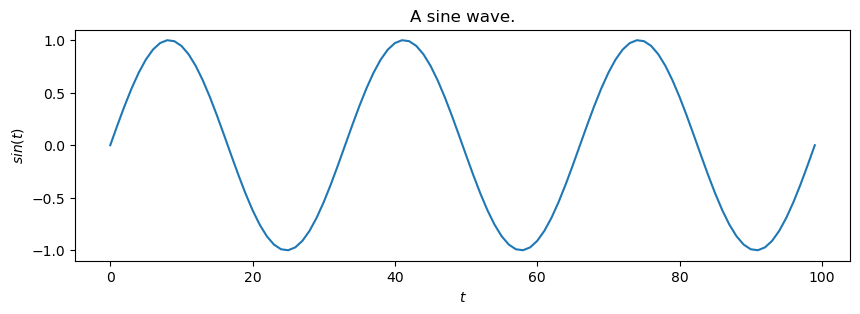

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

In [7]:
s = reservoir(X[0].reshape(1, -1))

print("New state vector shape: ", s.shape)

New state vector shape:  (1, 100)


In [8]:
s = reservoir.state()
s

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.38079708,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.38079708,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.38079708,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.38079708,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.38079708,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [9]:
states = np.empty((len(X), reservoir.output_dim))
for i in range(len(X)):
    states[i] = reservoir(X[i].reshape(1, -1))

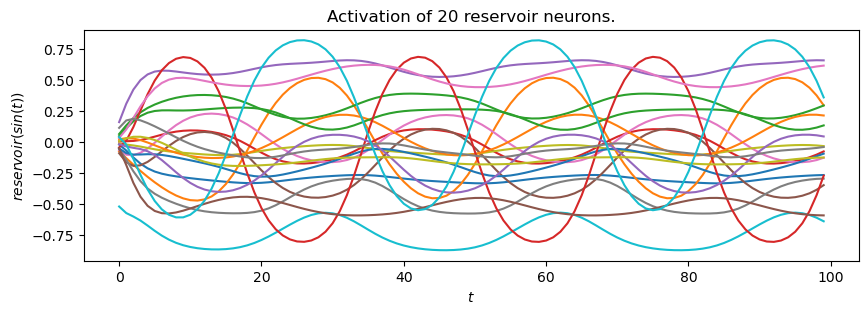

In [10]:
plt.figure(figsize=(10, 3))
plt.title("Activation of 20 reservoir neurons.")
plt.ylabel("$reservoir(sin(t))$")
plt.xlabel("$t$")
plt.plot(states[:, :20])
plt.show()

In [11]:
states = reservoir.run(X)

In [12]:
from reservoirpy.nodes import Reservoir, Ridge, FORCE, ESN